In [62]:
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import scipy as sci
import autograd as ad
import autograd.numpy as np
from cosmatrix import cosm,expm_pade
expm = expm_pade
from autograd.extend import primitive, defvjp
import scipy.optimize as opt
from qutip import *
from sympy import symbols
def annihilation(dim):
    return np.diag(np.sqrt(np.arange(1,dim)),1)
def creation(dim):
    return np.diag(np.sqrt(np.arange(1,dim)),-1)
def g3g4(phi_ex,beta, N, Ej, Ec,omega_c):
    def U_s(phi): 
        return (-beta*np.cos(phi-phi_ex)-3*np.cos((phi)/3))
#     phi_ex = 0.4*2*np.pi
    phi_min = sci.optimize.minimize(U_s,0).x
    # potential expansion around minimum
    firstd = ad.grad(U_s)
    secondd = ad.grad(firstd)
    thirdd = ad.grad(secondd)
    fourd = ad.grad(thirdd)
    fived = ad.grad(fourd)
    sixd = ad.grad(fived)
    sevend = ad.grad(sixd)
    eightd = ad.grad(sevend)
    c2 = secondd(phi_min[0])
    c3 = thirdd(phi_min[0])
    c4 = fourd(phi_min[0])
    c5 = fived(phi_min[0])
    c6 = sixd(phi_min[0])
    c7 = sevend(phi_min[0])/7/6/5/4/3/2
    c8 = eightd(phi_min[0])/8/7/6/5/4/3/2
    phimd=beta*np.cos(phi_min - phi_ex)/c2
    c2d = c3*(beta*np.cos(phi_min - phi_ex)/c2-9/8)
    c4d = -10/9*c3*(beta*np.cos(phi_min - phi_ex)/c2-81/80)
    c3d = c4*beta*np.cos(phi_min - phi_ex)/c2 +beta*np.cos(phi_min - phi_ex)
    omega_s = np.sqrt(8*c2*Ej*Ec)
    phi_zpf = np.power(2*Ec/Ej/c2,1/4)
    g2 = Ej*phi_zpf**2*c2/2
    g3 = Ej*phi_zpf**3*c3/3/2
    g4 = Ej*phi_zpf**4*c4/4/3/2
    g5 = Ej*phi_zpf**5*c5/5/4/3/2
    g6 = Ej*phi_zpf**6*c6/6/5/4/3/2
    g_int =  0.1*2*np.pi*np.power((2*Ec)/Ej,1/4)/phi_zpf
    A =  0.1*2*np.pi*np.power((2*Ec)/Ej,1/4)
    delta = omega_c - omega_s
    x=(-4 * np.sqrt(1540 * beta**2 + 141) + 45) / 77
    a = (c4d-3/2*c4/c2*c2d-104/72*(2*c3d/c2*c3-5/2*c3**2/c2**2*c2d))
    B = 2*omega_s*g_int**2/(omega_c**2-omega_s**2)
    u = 24*g4/omega_s - 104*g3**2/omega_s**2
    v = omega_s**2/(omega_c**2-omega_s**2)
    Bd = 4*Ej*A**2*omega_c**2/(omega_c**2-omega_s**2)**2*c2d
#     c3**2, 64/81*(beta**2-x**2)
#     c3/c2**2.5*(2*c3d-5/2*c3/c2*c2d)
# (c4d/c2**1.5-1.5*c4/c2**2.5*c2d)
    c2 = x+1/3
#     c4=-x-1/27
#     phi_md = x/(x+1/3)
#     c3 = np.sqrt(0.6*c2*c4)
#     c2d = (phi_md-9/8)*c3
#     c4d = (-10/9*phi_md+9/8)*c3
# (c4d-3/2*c4/c2*c2d-104/72*(2*c3d*c3/c2-5/2*c3**2*c3/c2**2*c2d))/c2d
    return c2,secondd(phi_min[0])
def os(phi_ex,beta,N,Ej,Ec,El,omega_c):
    phi_ex = 2*np.pi*phi_ex
    @primitive
    def Us_min(phi_ex):
        def U_s(phi): 
            return (-beta*np.cos(phi-phi_ex)-N*np.cos((phi)/N))
        phi_min = sci.optimize.minimize(U_s,0).x
        return phi_min
    
    def phi_minde(ans, phi_ex):
        def phi_minde_vjp(g):
            c2 = beta*np.cos(ans - phi_ex) + 1/N*np.cos(ans/N)
            return g*beta*np.cos(ans - phi_ex)/c2
        return phi_minde_vjp
    defvjp(Us_min, phi_minde)
    def U_s(phi): 
        return (-beta*np.cos(phi-phi_ex)-3*np.cos((phi)/3))
#     phi_ex = 0.4*2*np.pi
    phi_min = sci.optimize.minimize(U_s,0).x
    # potential expansion around minimum
    firstd = ad.grad(U_s)
    secondd = ad.grad(firstd)
    thirdd = ad.grad(secondd)
    fourd = ad.grad(thirdd)
    fived = ad.grad(fourd)
    sixd = ad.grad(fived)
    sevend = ad.grad(sixd)
    eightd = ad.grad(sevend)
    c2 = secondd(phi_min[0])
    c3 = thirdd(phi_min[0])/3/2
    c4 = fourd(phi_min[0])/4/3/2
    c5 = fived(phi_min[0])/5/4/3/2
    c6 = sixd(phi_min[0])/6/5/4/3/2
    c7 = sevend(phi_min[0])/7/6/5/4/3/2
    c8 = eightd(phi_min[0])/8/7/6/5/4/3/2
    
    
    omega_s = np.sqrt(8*c2*Ej*Ec)
    phi_zpf = np.power(2*Ec/Ej/c2,1/4)
    g2 = Ej*phi_zpf**2*c2/2
    g3 = Ej*phi_zpf**3*c3
    g4 = Ej*phi_zpf**4*c4
    g5 = Ej*phi_zpf**5*c5
    g6 = Ej*phi_zpf**6*c6
    phi_min = Us_min(phi_ex)
    # potential expansion around minimum
    c2 = beta*np.cos(phi_min - phi_ex) + 1/N*np.cos(phi_min/N)
    omega_s = np.sqrt(8*c2*Ej*Ec)
    phi_zpf = np.power(2*Ec/(Ej*c2),1/4)
    g2 = Ej*phi_zpf**2*c2/2
    sdim = 10
    s = annihilation(sdim)
    sd = creation(sdim)
    x2 = np.matmul(s+sd,s+sd)
    Hs = (omega_s * np.matmul(sd,s)
        - Ej*(beta*cosm(phi_zpf*(s+sd)+(phi_min-phi_ex)*np.identity(sdim))
        + N*cosm((phi_zpf*(s+sd)+phi_min*np.identity(sdim))/N))- g2*x2)
    x3 = np.matmul(x2,s+sd)
    x4 = np.matmul(x3,s+sd)
    x5 = np.matmul(x4,s+sd)
    x6 = np.matmul(x5,s+sd)
#     Hs = omega_s * np.matmul(sd,s)+g3*x3+g4*x4
    energy = np.linalg.eigh(Hs)[0]
    energy = energy-energy[0]*np.ones(len(energy))
    omega_s = energy[1]
    anh = (energy[2]-energy[1]-energy[1]-energy[0])/2/np.pi
#     anh_exp = qload('./symbolic/anh')[0]
#     g3sp = symbols('g3', real=True)
#     g4sp = symbols('g4', real=True)
#     g5sp = symbols('g5', real=True)
#     omega = symbols('omega', real=True)
#     print(anh-anh_exp.subs({g3sp:g3,g4sp:g4,g5sp:g5,omega:omega_s})/2/np.pi)
    return omega_s,anh
def minimize_anh( beta, N, Ej, Ec, El, omega_c):
    # Wrapper function that takes only phi_ex as an argument
    def anh_wrapper(phi_ex):
        omega_s, anh = os(phi_ex, beta, N, Ej, Ec, El, omega_c)
        return np.abs(anh)
    bounds = [(0,0.5)]
    # Optimize phi_ex
    result = opt.direct(anh_wrapper, bounds = bounds)

    # Return the result of the optimization
    return result.x, result.fun

    
def find_optimal_k(A, B, D):
    # Define a large initial minimum difference
    min_diff = float('inf')
    optimal_k = None
    
    # Iterate over a range of possible k values
    # The range can be adjusted based on expected size of k or other insights you have about your problem
    for k in range(-1000, 1000):
        # Calculate the difference for this value of k
        diff = abs(A - (B + k * D))
        
        # If this is the smallest difference we've found so far, update min_diff and optimal_k
        if diff < min_diff:
            min_diff = diff
            optimal_k = k
            
    return optimal_k
# Function to calculate overlap (you might use inner product, fidelity, etc.)
def calculate_overlap(state1, state2):
    return abs((state1.dag() * state2)[0,0])**2
import qutip as qt



def SNAIL_H(phi_ex,beta,N,Ej,Ec):
    phi_ex = 2*np.pi*phi_ex
    @primitive
    def Us_min(phi_ex):
        def U_s(phi): 
            return (-beta*np.cos(phi-phi_ex)-N*np.cos((phi)/N))
        phi_min = sci.optimize.minimize(U_s,0).x
        return phi_min
    
    def phi_minde(ans, phi_ex):
        def phi_minde_vjp(g):
            c2 = beta*np.cos(ans - phi_ex) + 1/N*np.cos(ans/N)
            return g*beta*np.cos(ans - phi_ex)/c2
        return phi_minde_vjp
    defvjp(Us_min, phi_minde)
    
    phi_min = Us_min(phi_ex)
    # potential expansion around minimum
    c2 = beta*np.cos(phi_min - phi_ex) + 1/N*np.cos(phi_min/N)
    omega_s = np.sqrt(8*c2*Ej*Ec)
    phi_zpf = np.power(2*Ec/(Ej*c2),1/4)
    g2 = Ej*phi_zpf**2*c2/2
    sdim = 10
    s = annihilation(sdim)
    sd = creation(sdim)
    x2 = np.matmul(s+sd,s+sd)
    c3 = (N**2-1)/N**2*np.sin(phi_min/N)
    g3 = Ej*phi_zpf**3*c3/3/2
    x3 = np.matmul(s+sd,x2)
    c4 = -beta*np.cos(phi_min-phi_ex) -1/N**3*np.cos(phi_min/N)
    
    g4 = Ej*phi_zpf**4*c4/4/3/2
    x4 = np.matmul(s+sd,x3)
    
    Hs = (omega_s * np.matmul(sd,s)
        - Ej*(beta*cosm(phi_zpf*(s+sd)+(phi_min-phi_ex)*np.identity(sdim))
        + N*cosm((phi_zpf*(s+sd)+phi_min*np.identity(sdim))/N))- g2*x2)
#     Hs = omega_s * np.matmul(sd,s)+g3*x3+g4*x4
    energy,U = np.linalg.eigh(Hs)
    U_dag = np.conjugate(U.transpose())
    Hs = Hs
    return Hs-energy[0]*np.identity(sdim),1j*(s-sd)
def floquet_spec(omega,A,phi_ex,Ej,Ec,beta):
#     phi_ex = 0.41340478058712055
    H0,Hc = SNAIL_H(phi_ex,beta,N,Ej,Ec)
    energies,U=np.linalg.eig(H0)
    energies = energies - energies[0]*np.ones(len(energies))
    energies = energies/2/np.pi
    # U_dag = np.conjugate(U.transpose())
    # U_dag@Hc@U
    energies = np.sort(energies)
    omega_s = energies[1]
    H0 = Qobj(H0)
    Hc = Qobj(Hc)
    args = {'w': omega}
    T = (2*np.pi)/omega
    H = [H0, [Hc, lambda t, args: A*np.cos(args['w']*t)]] 
    options = Options(nsteps=100000)  # Increasing nsteps to 10000, adjust as needed
    f_modes, f_energies = floquet_modes(H, T, args, False, options=options) 
    
    # Define your system dimension
    sdim = 10
    floquet_states = f_modes
    # Create your basis states
    basis_states = [qt.basis(sdim, i) for i in range(3)]
    # Initialize a list to hold the indices of the Floquet states with the maximum overlap for each basis state
    max_overlap_indices = [-1] * 3
    max_overlaps = [0] * 3
    # Loop over each Floquet state
    for f_index, f_state in enumerate(floquet_states):

        # Loop over each basis state
        for b_index, b_state in enumerate(basis_states):

            # Calculate the overlap
            overlap = calculate_overlap(f_state, b_state)

            # If this is the maximum overlap for this basis state, store the index
            if overlap > max_overlaps[b_index]:
                max_overlaps[b_index] = overlap
                max_overlap_indices[b_index] = f_index
    energy01 = f_energies[max_overlap_indices[1]]/2/np.pi-f_energies[max_overlap_indices[0]]/2/np.pi
    k = find_optimal_k(omega_s, energy01, omega/2/np.pi)
    energy01 =energy01+k*omega/2/np.pi
    omega_ss = energy01-omega_s
    energy02 = f_energies[max_overlap_indices[2]]/2/np.pi-f_energies[max_overlap_indices[0]]/2/np.pi
    k = find_optimal_k(2*omega_s, energy02, omega/2/np.pi)
    energy02 =energy02+k*omega/2/np.pi
    anh = energy02 - energy01 - energy01
    if (max_overlaps<(np.sqrt(2)/2*np.ones(3))).all():
        omega_ss = 1000
        anh = 1000
    return np.abs(omega_ss),anh
def minimize_anhfl( omega,A,phi_ex,Ej,Ec,beta):
    # Wrapper function that takes only phi_ex as an argument
    def anh_wrapper(phi_ex):
        omega_s, anh = floquet_spec(omega,A,phi_ex,Ej,Ec,beta)
        return np.abs(anh)
    bounds = [(0,0.5)]
    # Optimize phi_ex
    
    result = opt.direct(anh_wrapper, bounds = bounds)

    # Return the result of the optimization
    return result.x, result.fun
def coupled_spectrum(phi_ex,omega_c,g_intfa,Ec,Ej,beta):
    N = 3
    phi_ex = 2*np.pi*phi_ex
    g_intfa = 0.15
    @primitive
    def Us_min(phi_ex):
        def U_s(phi): 
            return (-beta*np.cos(phi-phi_ex)-N*np.cos((phi)/N))
        phi_min = sci.optimize.minimize(U_s,0).x
        return phi_min
    
    def phi_minde(ans, phi_ex):
        def phi_minde_vjp(g):
            c2 = beta*np.cos(ans - phi_ex) + 1/N*np.cos(ans/N)
            return g*beta*np.cos(ans - phi_ex)/c2
        return phi_minde_vjp
    defvjp(Us_min, phi_minde)
    
    phi_min = Us_min(phi_ex)
    # potential expansion around minimum
    c2 = beta*np.cos(phi_min - phi_ex) + 1/N*np.cos(phi_min/N)
    omega_s = np.sqrt(8*c2*Ej*Ec)
    phi_zpf = np.power(2*Ec/(Ej*c2),1/4)
    g2 = Ej*phi_zpf**2*c2/2
    sdim = 10
    s = annihilation(sdim)
    sd = creation(sdim)
    x2 = np.matmul(s+sd,s+sd)
    c3 = (N**2-1)/N**2*np.sin(phi_min/N)
    g3 = Ej*phi_zpf**3*c3/3/2
    c4 = -beta*np.cos(phi_min-phi_ex) -1/N**3*np.cos(phi_min/N)

    g4 = Ej*phi_zpf**4*c4/4/3/2
    x3 = np.matmul(s+sd,x2)
    x4 = np.matmul(s+sd,x3)
    Hs = (omega_s * np.matmul(sd,s)
        - Ej*(beta*cosm(phi_zpf*(s+sd)+(phi_min-phi_ex)*np.identity(sdim))
        + N*cosm((phi_zpf*(s+sd)+phi_min*np.identity(sdim))/N))- g2*x2)
#     Hs = omega_s * np.matmul(sd,s)+g3*x3+g4*x4
    cdim = 5
    c = annihilation(cdim)
    cd = creation(cdim)
    Hc = omega_c*np.matmul(cd,c)
    Ic = np.identity(cdim)
    Is = np.identity(sdim)
    Hs = np.kron(Hs,Ic)
    Hc = np.kron(Is,Hc)
    g_int = g_intfa*2*np.pi*np.power((2*Ec)/Ej,1/4)/phi_zpf
    H_int = g_int*np.kron(1j*(s-sd),cd+c)
#     H_int = g_int*(np.kron(sd,c)+np.kron(s,cd))
    H = Hs + Hc + H_int
    energy,dressed_states = np.linalg.eigh(H)
    energy,U = np.linalg.eigh(H)
    U_dag = np.conjugate(U.transpose())
    H = U_dag@H@U
    return H-energy[0]*np.identity(sdim*cdim),U_dag@np.kron(1j*(s-sd),Ic)@U
def find_best_b_and_k(a, B, omega):
    min_diff = float('inf')  # Initialize with a very large number
    best_b = None
    best_k = None

    # Iterate over each element in B
    for b in B:
        # Iterate over each k in the range [-1000, 1000]
        for k in range(-1000, 1001):  # 1001 is used to include 1000 in the range
            diff = abs(a - (b + k * omega))
            # Update min_diff and best_b if a smaller difference is found
            if diff < min_diff:
                min_diff = diff
                best_b = b
                best_k = k

    return best_b, best_k, min_diff
def floquet_comp(omega,A,phi_ex,omega_c,Ec,Ej,beta):
    omega_c = omega_c *2*np.pi
    g_intfa = 0.15
    N = 3
    H0,Hc = coupled_spectrum(phi_ex,omega_c,g_intfa,Ec,Ej,beta)
    energies,U=np.linalg.eig(H0)
    energies = energies - energies[0]*np.ones(len(energies))
    energies = energies
    # U_dag = np.conjugate(U.transpose())
    # U_dag@Hc@U
    energies = np.sort(energies)
    omega_cp = energies[1]
    H0 = Qobj(H0)
    Hc = Qobj(Hc)
    args = {'w': omega}
    T = (2*np.pi)/omega
    H = [H0, [Hc, lambda t, args: A*np.cos(args['w']*t)]] 
    options = Options(nsteps=100000)  # Increasing nsteps to 10000, adjust as needed
    f_modes, f_energies = floquet_modes(H, T, args, False, options=options) 
    
    # Define your system dimension
    sdim = 10
    cdim = 5
    floquet_states = f_modes
    # Create your basis states
    basis_states = [qt.basis(sdim*cdim, i) for i in range(2)]
    # Initialize a list to hold the indices of the Floquet states with the maximum overlap for each basis state
    max_overlap_indices = [-1] * 3
    max_overlaps = [0] * 3
    # Loop over each Floquet state
    for f_index, f_state in enumerate(floquet_states):

        # Loop over each basis state
        for b_index, b_state in enumerate(basis_states):

            # Calculate the overlap
            overlap = calculate_overlap(f_state, b_state)

            # If this is the maximum overlap for this basis state, store the index
            if overlap > max_overlaps[b_index]:
                max_overlaps[b_index] = overlap
                max_overlap_indices[b_index] = f_index
    print(max_overlaps[1],max_overlaps[0])
    energy01 = f_energies[max_overlap_indices[1]]-f_energies[max_overlap_indices[0]]
    k = find_optimal_k(omega_cp, energy01, omega)
    energy01 =energy01+k*omega
    omega_cpp = energy01
    b,k,mind_diff = find_best_b_and_k(energy01, f_energies , omega)
    return omega_cpp
def energy_der(omega,A,phi_ex,omega_c,Ec,Ej,beta):
    delta = 1e-5
    der = (-floquet_comp(omega,A,phi_ex,omega_c,Ec,Ej,beta) + floquet_comp(omega,A,phi_ex+delta,omega_c,Ec,Ej,beta))/delta
    return der
def T1f(der):
    factor = np.sqrt(2*np.abs(np.log(2*np.pi*1*1e-5)))
    return 1/(factor*10**-6*der)
def minimize_Tp1(omega,A,phi_ex,omega_c,Ec,Ej,beta):
    options = {'maxfev': 20}
    # Wrapper function that takes only phi_ex as an argument
    def wrapper(omega_c):
        der = energy_der(omega,A,phi_ex,omega_c,Ec,Ej,beta)
        T1fs = np.abs(T1f(der))
        return 1/T1fs*1e9
    def callback_function(xk):
#     """Callback function to check the current function value."""
        fval = wrapper(xk)
        if fval < 0.04:
            return True  # Returning True will stop the optimization
    # Optimize phi_ex
    bounds = [(1,3.2)]
    result = opt.minimize(wrapper,omega_c, bounds = bounds,method='Nelder-Mead',options=options)

    # Return the result of the optimization
    return result.x, result.fun

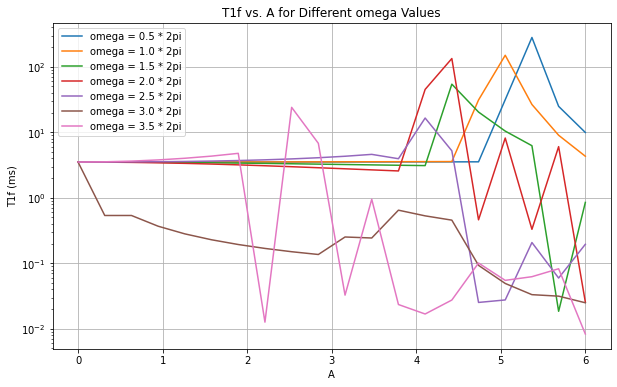

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming T1f and energy_der functions are defined somewhere in your code
# def T1f(x):
#     # implementation
#     pass
# def energy_der(omega, A, phi_ex, omega_c, Ec, Ej, beta):
#     # implementation
#     pass

beta = 0.12
omega_c1 = 3
# omega_c2 = 1.8
N = 3
Ej = 15 * 2 * np.pi
Ec = 0.7 * 2 * np.pi
omegas = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5]) * 2 * np.pi
phi_ex = 0.38059900660029355
A_values = np.linspace(0, 6 * 2 * np.pi, 20)

plt.figure(figsize=(10, 6))

# Loop over different omegas
for omega in omegas:
    T1f_values_omega_c1 = []
    for A in A_values:
        # Calculating T1f values for different A values and omega_c values
        T1f_values_omega_c1.append(T1f(np.abs(energy_der(omega, A, phi_ex, omega_c1, Ec, Ej, beta)))/1e6)
    # Plotting for each omega
    plt.plot(A_values/2/np.pi, T1f_values_omega_c1, label=f'omega = {omega/(2*np.pi):.1f} * 2pi')

plt.xlabel('A')
plt.ylabel('T1f (ms)')
plt.title('T1f vs. A for Different omega Values')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the floquet_comp function is defined somewhere in your code
# def floquet_comp(omega, A, phi_ex, omega_c, Ec, Ej, beta):
#     # implementation
#     pass

beta = 0.12
omega_c1 = 3
N = 3
Ej = 15 * 2 * np.pi
Ec = 0.7 * 2 * np.pi
omega = 2 * 2 * np.pi
A = 4.4* 2 * np.pi
phi_ex_values = np.linspace(0, 0.5, 100)  # 50 points between 0 and 0.5

e_values = []

# Loop over phi_ex values
for phi_ex in phi_ex_values:
    e = floquet_comp(omega, A, phi_ex, omega_c1, Ec, Ej, beta)  # Compute e for each phi_ex
    e_values.append(e/2/np.pi)



0.4678499418664703 0.4873697047791509
0.46783924340856103 0.4873607042067607
0.4678065291355174 0.48733304602312993
0.46774994111824053 0.4872847750660042
0.4676665182223538 0.4872127698474082
0.4675523644151111 0.4871129292558275
0.46740268664165213 0.486980227141806
0.4672126060388533 0.4868095169321019
0.4669766982759771 0.4865951057901045
0.46668958926185033 0.4863313556803352
0.46634607373743786 0.48601280724682755
0.46594122160266266 0.48563430483110603
0.4654705249400007 0.4851911278238894
0.4649299141504863 0.4846790229890813
0.464315582761465 0.4840942460196571
0.46362487145657166 0.4834335489858585
0.4628546842754635 0.4826941211530924
0.462002102519005 0.48187354491318635
0.4610683758663054 0.48097085847052956
0.4600476131560682 0.4799825651156673
0.45894063050600575 0.4789084382361064
0.45774601473455157 0.47774715665543604
0.45646274840143625 0.4764977144736392
0.45508995614167297 0.475159251360147
0.4536268455938866 0.4737310004114074
0.45207269343825734 0.472212262178101

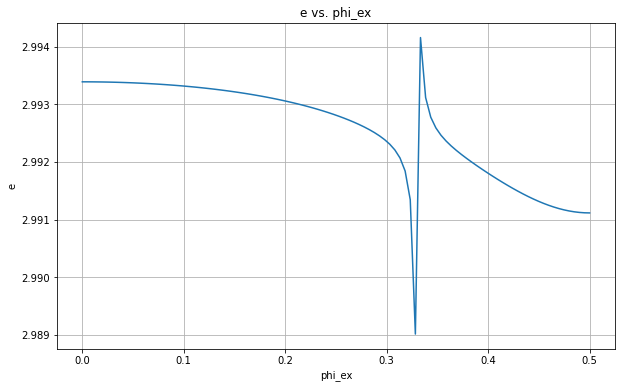

In [61]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(phi_ex_values, e_values)
plt.xlabel('phi_ex')
plt.ylabel('e')
plt.title('e vs. phi_ex')
plt.grid(True)
plt.show()

In [52]:
energy_der(omega,A,phi_ex,omega_c,Ec,Ej,beta)

0.02530529208399912

In [195]:
beta = 0.12
N = 3
Ej = 90 * 2 * np.pi
Ec = 0.177 * 2 * np.pi
omega = 1* 2 * np.pi
phi_ex = 0.4002794603101128

# Range for A
A_values = np.linspace(0*2*np.pi, 5*2*np.pi, 20)

# # Sweep A and compute phi_ex for each value
# for A in A_values:
#     phi_ex, _ = minimize_anhfl(omega, A, 0.4, Ej, Ec, beta)
#     phi_ex_values.append(phi_ex)



In [196]:
# # Plotting
# plt.scatter(A_values/2/np.pi, phi_ex_values)
# plt.xlabel(' A')
# plt.ylabel('phi_ex')
# plt.title('phi_ex vs A')
# plt.show()

In [198]:
omega_s=np.abs(SNAIL_H(phi_ex,beta,N,Ej,Ec)[0][1][1]/2/np.pi)
omegac_values = []
omegac_pred = []
T_values = []
etas = []

In [199]:

for A in A_values:
#     bare_phiex,anh = minimize_anh( beta, N, Ej, Ec, 0, 0)
#     bare_phiex = bare_phiex[0]
#     phi_ex,anh=minimize_anhfl(omega,A,bare_phiex,Ej,Ec,beta)
    omega_c = 2.8
    omegac, T=minimize_Tp1(omega,A,phi_ex,omega_c,Ec,Ej,beta)
    print(omegac,A)
    omegac_values.append(omegac)
    T_values.append(T)
    eta = A*2*omega_s/(omega_s**2-(omega/2/np.pi)**2)/2/np.pi
    etas.append(eta)
    omega_cp=np.sqrt(2*(1+eta**2)*omega_s*Ec/2/np.pi)
    omegac_pred.append(omega_cp)

[1.74125] 0.0
[1.745625] 1.6534698176788385
[1.75875] 3.306939635357677
[1.780625] 4.960409453036515
[1.81125] 6.613879270715354
[1.84625] 8.267349088394193
[1.894375] 9.92081890607303
[1.946875] 11.57428872375187
[2.0125] 13.227758541430708
[2.069375] 14.881228359109546
[2.1415625] 16.534698176788385
[2.218125] 18.188167994467225
[2.2990625] 19.84163781214606
[2.3865625] 21.4951076298249
[2.4784375] 23.14857744750374
[2.57578125] 24.802047265182576
[2.67804687] 26.455517082861416
[2.77703125] 28.108986900540256
[2.88121094] 29.76245671821909
[2.99632813] 31.41592653589793


In [201]:
etas

[0.0,
 0.09409892186365798,
 0.18819784372731596,
 0.2822967655909739,
 0.3763956874546319,
 0.47049460931828996,
 0.5645935311819478,
 0.658692453045606,
 0.7527913749092638,
 0.8468902967729218,
 0.9409892186365799,
 1.035088140500238,
 1.1291870623638955,
 1.2232859842275539,
 1.317384906091212,
 1.4114838279548696,
 1.5055827498185277,
 1.599681671682186,
 1.6937805935458436,
 1.7878795154095017]

In [202]:
1/np.array(T_values)

array([ 22.83897404,  27.67944352,  27.36281957,  48.64894211,
        36.9552143 ,  11.93671484,  19.18506688,  14.36414429,
         2.80775761,  30.46682707,  40.46029311,  61.34402604,
        18.61440664,  44.97800131,  40.00247159,  33.50680922,
        95.63287036,   0.49546413, 272.05762568, 167.33251454])

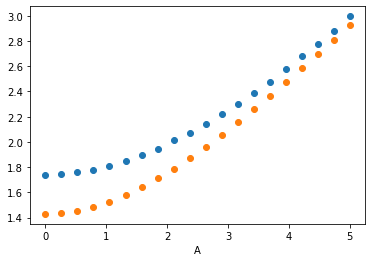

In [200]:
plt.scatter(A_values/2/np.pi, np.array(omegac_values))
plt.scatter(A_values/2/np.pi, np.array(omegac_pred))
plt.xlabel('A')
plt.show()

In [820]:
eta

0.31029647031164753

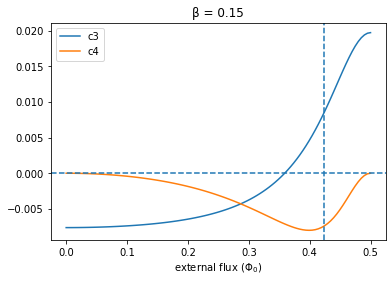

In [403]:
beta = 0.15
omega_c = 2
N = 3
Ej = 74*2*np.pi
Ec = 0.275*2*np.pi
plot_phisweep(Ec,Ej,beta,)
# Lists to store results
phi_ex_values = []

omega = 2*2*np.pi
# Range for A
A_values = np.linspace(0, 1.5*2*np.pi, 5)

# Sweep A and compute phi_ex for each value
for A in A_values:
    phi_ex, _ = minimize_anhfl(omega, A, 0.4, Ej, Ec, beta)
    phi_ex_values.append(phi_ex)
# Plotting


Text(0.5, 1.0, 'phi_ex vs A')

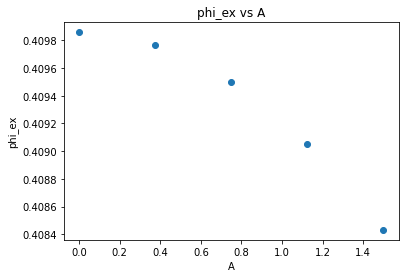

In [325]:
plt.scatter(A_values/2/np.pi, phi_ex_values)
plt.xlabel('A')
plt.ylabel('phi_ex')
plt.title('phi_ex vs A')

In [326]:
omega_s=np.abs(SNAIL_H(phi_ex,beta,N,Ej,Ec)[0][1][1]/2/np.pi)
omegac_values = []
omegac_pred = []
T_values = []

In [327]:
for A in A_values:
    bare_phiex,anh = minimize_anh( beta, N, Ej, Ec, 0, 0)
    bare_phiex = bare_phiex[0]
    phi_ex,anh=minimize_anhfl(omega,A,bare_phiex,Ej,Ec,beta)
    phi_ex = phi_ex[0]
    omegac, T=minimize_Tp1(omega,A,phi_ex,omega_c,Ec,Ej,beta)
    omegac_values.append(omegac)
    T_values.append(T)
    eta = A*2*omega_s/(omega_s**2-(omega/2/np.pi)**2)/2/np.pi
    omega_cp=np.sqrt(2*(1+eta**2)*omega_s*Ec/2/np.pi)
    omegac_pred.append(omega_cp)

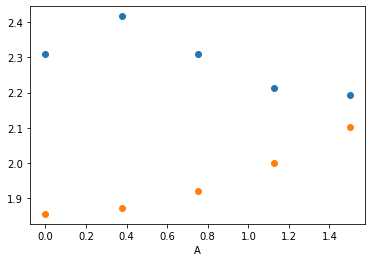

In [328]:
plt.scatter(A_values/2/np.pi, np.array(omegac_values))
plt.scatter(A_values/2/np.pi, np.array(omegac_pred)[0:5])
plt.xlabel('A')
plt.show()